# Effects of different factors on a student's academic performance
## by Vyacheslav Yamont

## Investigation Overview

In this investigation, I wanted to look at the characteristics of students that could be used to predict their academic performance. The main focus was on the next characteristics of students: country (origin of the student), gender, number of computers at home, programming rate, and wealth status.

## Dataset Overview

This document explores The Programme for International Student Assessment (PISA) 2012 Dataset. PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school. The data was cleaned and only required parameters were extracted to the final dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Setup plot parameters
sb.set()
params = {
    'legend.fontsize': 'medium',
    'figure.figsize': (10, 6),
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'xx-large',
    'xtick.labelsize': 'large',
    'ytick.labelsize': 'large'
}
plt.rcParams.update(params)

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('data/pisa2012_cleaned.csv')

In [3]:
# Convert computers_number and programming into ordered categorical types
ordinal_var_dict = {
    'Number of Computers': ['None', 'One', 'Two', 'Three or more'],
    'Programming Rate':
    ['Never or rarely', 'Sometimes', 'Often', 'Always or almost always']
}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(
        ordered=True, categories=ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

# Convert gender to unordered categorical type
cat_var = pd.api.types.CategoricalDtype(ordered=False,
                                        categories=['Male', 'Female'])
df['Gender'] = df['Gender'].astype(cat_var)

# Convert country to unordered categorical type
cat_var = pd.api.types.CategoricalDtype(ordered=False,
                                        categories=df.Country.unique())
df['Country'] = df['Country'].astype(cat_var)

## Top Countries with Outperforming Students

The dataset is represented by students from 61 countries. An outperforming student in one out of three subjects (math, reading and science) is one who scored more than 75% of all other students in that subject. Singapore is a leader by number of outperforming students in every subject. China and Japan are in all three top 5 lists.

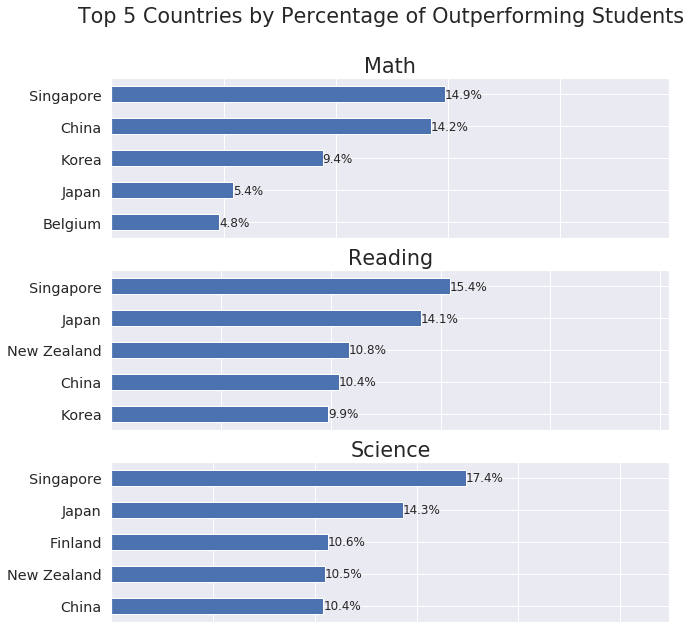

In [4]:
def best_score_countries(score):
    # Create a copy
    df_copy = df.copy()

    # Take upper quartile threshold
    thr = df_copy[score].max() * 0.75

    # Create outperform property
    df_copy['outperform'] = df_copy[score] > thr

    # Find percentage of outperform students in countries
    dep = df_copy.groupby('Country').outperform.mean().mul(100)

    # Plot
    dep.sort_values().tail(5).plot(kind='barh')
    plt.xlim(0, dep.max() + 10)
    plt.title(score)
    plt.xlabel(None)
    plt.ylabel(None)

    # Write the total number after the bar
    indexes, labels = plt.yticks()
    for index, label in zip(indexes, labels):
        val = dep[label.get_text()]
        plt.text(y=index, x=val, s='{:.1f}%'.format(val), va='center')

    #remove x-ticks
    plt.tick_params(axis='x',
                    which='both',
                    bottom=False,
                    top=False,
                    labelbottom=False)

plt.figure(figsize=[10, 10])
plt.suptitle('Top 5 Countries by Percentage of Outperforming Students',
             size='xx-large')

# Plot Math
plt.subplot(3, 1, 1)
best_score_countries('Math')

# Plot Reading
plt.subplot(3, 1, 2)
best_score_countries('Reading')

# Plot Science
plt.subplot(3, 1, 3)
best_score_countries('Science')

## Scores and Gender

Here is the answer to the age-old question: "Who's smarter in the classroom - men or women?". The analysis of data shows that female students in common are more inclined towards reading. On the contrary, male students are more inclined to math and science. But on average there is no statistical difference in overall performance.

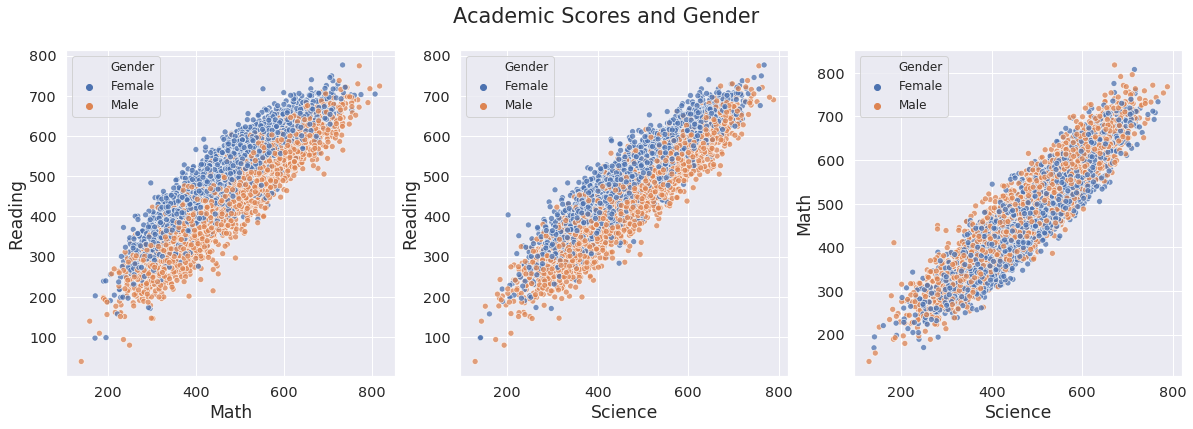

In [5]:
# Plot matrix: sample 10000 students so that plots render faster
samples = np.random.choice(df.shape[0], 10000, replace=False)
students_samp = df.loc[samples, :]

fig = plt.figure(figsize=[20, 6])
plt.suptitle('Academic Scores and Gender', size='xx-large')

plt.subplot(1, 3, 1)
sb.scatterplot(data=students_samp,
               x='Math',
               y='Reading',
               hue='Gender',
               alpha=0.75)

plt.subplot(1, 3, 2)
sb.scatterplot(data=students_samp,
               x='Science',
               y='Reading',
               hue='Gender',
               alpha=0.75)

plt.subplot(1, 3, 3)
sb.scatterplot(data=students_samp,
               x='Science',
               y='Math',
               hue='Gender',
               alpha=0.75);

## Scores and Number of Computers

There is a strong correlation between the number of computers in a family and student's academic performance.

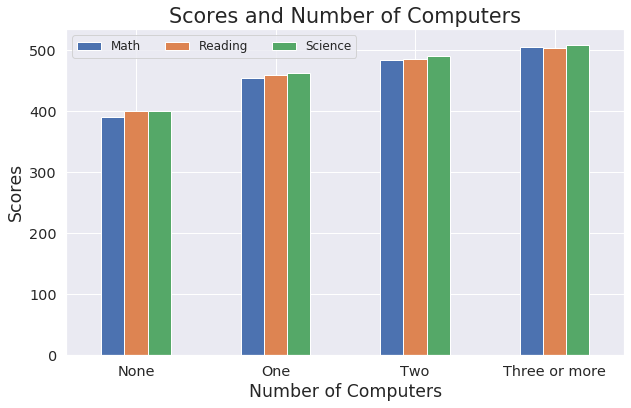

In [6]:
def barplot_scores(data, var, title):
    # Group data by var and calculate mean scores
    data = data.groupby(var)[['Math', 'Reading', 'Science']].mean()

    # Plot barplot
    ax = data.plot.bar(rot=0)
    plt.ylabel('Scores')
    plt.title(title)
    
    return ax


ax = barplot_scores(df, 'Number of Computers', 'Scores and Number of Computers')
ax.legend(ncol = 3); # re-arrange legend to reduce overlapping

## Gender and Programming Rate

Here is clear evidence that male students like programming more than female students. And the greatest difference is in the "Never or rarely" group, which means female students prefer to avoid coding.

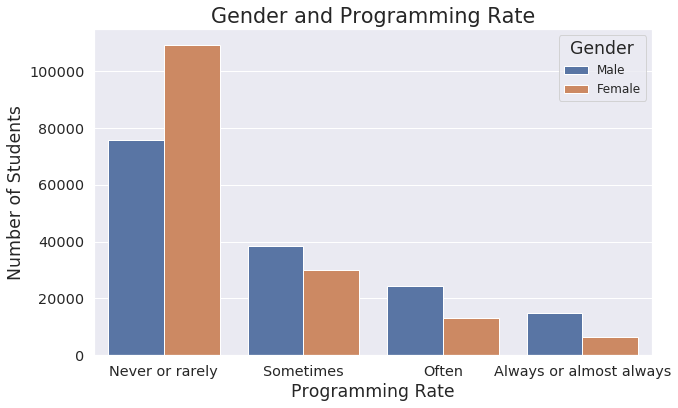

In [7]:
sb.countplot(data = df, x = 'Programming Rate', hue = 'Gender')
plt.ylabel('Number of Students')
plt.title('Gender and Programming Rate');

## Wealth Index across Number of Computers and Programming Rate

There is an obvious strong correlation between wealth index and family number of computers. But we can notice a slight tendency on the edge cases (none and ≥3 computers) that the higher rate of programming produces higher wealth indexes. All that means that it's better to code than not to code.

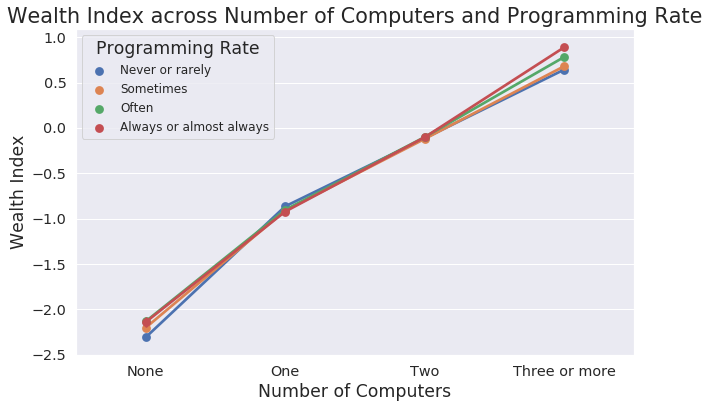

In [8]:
ax = sb.pointplot(data=df,
                  x='Number of Computers',
                  y='Wealth Index',
                  hue='Programming Rate')

plt.title('Wealth Index across Number of Computers and Programming Rate');